In [1]:
# importanto biblioteca
import pandas as pd

In [2]:
# Leitura dos arquivos
df1 = pd.read_excel('/content/drive/MyDrive/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/datasets/Salvador.xlsx')

In [4]:
# juntando todos os dataframes
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
df['LojaID'] = df['LojaID'].astype('object')

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## Tratando valores faltantes

In [11]:
# consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
# substituindo valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
# apagando linhas com valores nulos
df.dropna(inplace=True)

In [16]:
# removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

## Criando colunas novas

In [18]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
df['Receita/vendas'] = df['Receita'] / df['Vendas']

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [23]:
# retornando a maior receita
df['Receita'].max()


3544.0

In [25]:
# retornando a menor receita
df['Receita'].min()

3.34

## Trabalhando com datas

In [29]:
# transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [27]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/vendas    float64
dtype: object

In [30]:
# transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [32]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/vendas           float64
dtype: object

In [35]:
# agrupando por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
# criando nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,6.0,2019
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019
76,Aracaju,2018-01-01,33.51,1523,4,134.04,4.0,2018
102,Recife,2019-01-01,96.50,982,7,675.50,7.0,2019
32,Salvador,2019-01-01,151.27,1035,1,151.27,1.0,2019


In [39]:
# extraindo o mês e o dia
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [40]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,Mes_Venda,Dia_Venda
67,Aracaju,2018-01-01,78.13,1521,4,312.52,4.0,2018,1,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019,1,1
82,Salvador,2019-01-01,207.88,1035,1,207.88,1.0,2019,1,1


In [41]:
# retornando data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [43]:
# diferença de dias
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()

In [44]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
66,Salvador,2019-01-01,70.20,1035,3,210.60,3.0,2019,1,1,365 days
46,Salvador,2019-01-01,34.84,1034,3,104.52,3.0,2019,1,1,365 days
6,Recife,2019-01-01,16.27,981,6,97.62,6.0,2019,1,1,365 days


In [46]:
# criando coluna de trimestre
df['Semestre_Venda'] = df['Data'].dt.quarter

In [47]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Semestre_Venda
164,Natal,2019-01-02,6.59,1035,1,6.59,1.0,2019,1,2,366 days,1
78,Natal,2019-02-07,310.00,853,4,1240.00,4.0,2019,2,7,402 days,1
96,Recife,2019-01-01,165.36,982,7,1157.52,7.0,2019,1,1,365 days,1


## Visualização de dados

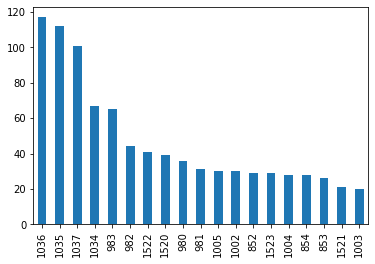

In [48]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

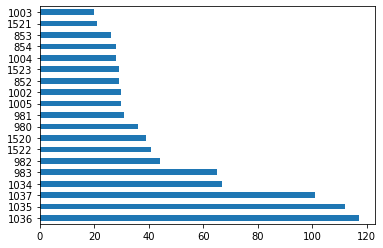

In [49]:
# Gráfico de barras horizontais
df['LojaID'].value_counts().plot.barh()

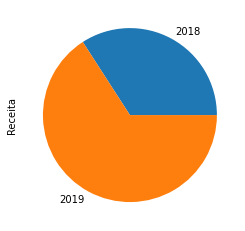

In [51]:
# Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [52]:
# total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

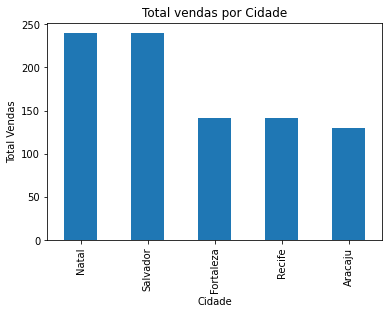

In [55]:
# adicionando título e alterando nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [56]:
# alterando estilo
plt.style.use('ggplot')

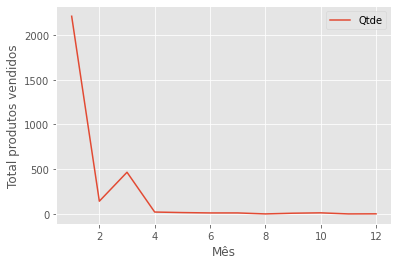

In [61]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

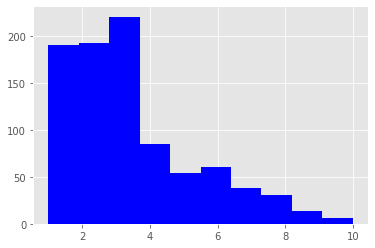

In [62]:
# Histograma
plt.hist(df['Qtde'], color='b');

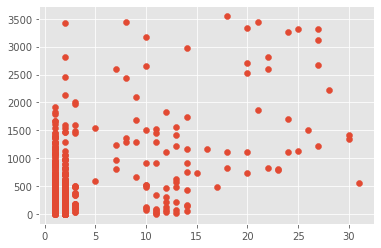

In [63]:
# Gráfico de disperção
plt.scatter(x=df['Dia_Venda'], y=df['Receita'])

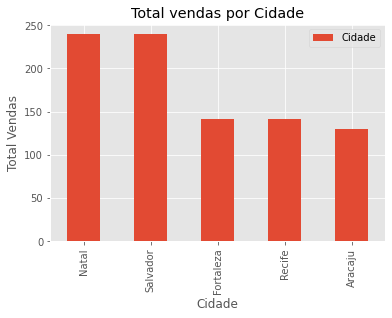

In [66]:
# Salvando gráficos em png
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')
plt.legend()
plt.savefig('venda_x_cidade.png')